# Sales Analysis 2019


#### Import libraries

In [1]:
import pandas as pd
import numpy as np



#### Read in merged Dataframe

In [2]:
all_sales = pd.read_csv("./Sales_Data/all_sales.csv")


### Data Exploration and Cleaning Process

In [3]:
# Getting data types
all_sales.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [4]:
# Deleting Rows where all values were equal to their column name
all_sales = all_sales[all_sales["Product"] != "Product"]

In [5]:
# Changing data types
all_sales["Quantity Ordered"] = pd.to_numeric(all_sales["Quantity Ordered"])
all_sales["Price Each"] = pd.to_numeric(all_sales["Price Each"])
all_sales["Order Date"] = pd.to_datetime(all_sales["Order Date"])

In [6]:
# amount of NA Values
all_sales.isna().sum()

# droping na values
all_sales = all_sales.dropna(how="all")

In [7]:
# Creating Month column
all_sales["Month"] = all_sales["Order Date"].dt.month_name()
all_sales["Month number"] = all_sales["Order Date"].dt.month
all_sales["Day"] = all_sales["Order Date"].dt.day
all_sales = all_sales.sort_values(by = "Month number")


In [8]:
# add city column
def city(address):
    return address.split(",")[1].strip()

def state(address):
    return address.split(",")[2].split(" ")[1]

all_sales["City"] = all_sales["Purchase Address"].apply(lambda x: f"{city(x)} ({state(x)})")

### Question 1: What was the best month for sales? How much was earned that month?

In [9]:
all_sales["Total"] = all_sales["Price Each"] * all_sales["Quantity Ordered"]

sales_per_month = all_sales["Quantity Ordered"] * all_sales["Price Each"]
sales_per_month = all_sales.groupby(["Month number"])["Total"].sum().to_frame().reset_index()
sales_per_month["Total"] = sales_per_month["Total"].round(decimals= 0)


In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib as mpl

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9936\3921643388.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


<function matplotlib.pyplot.show(close=None, block=None)>

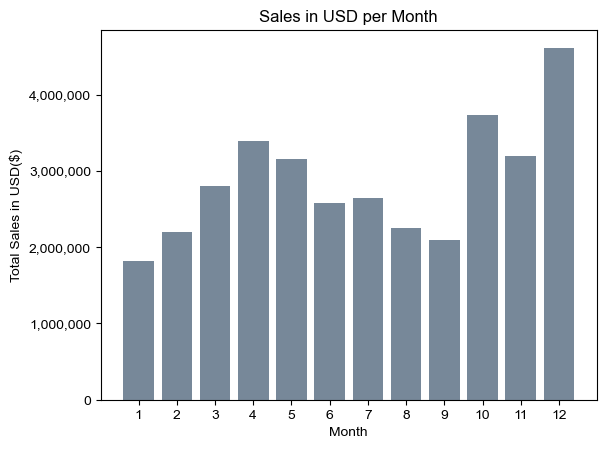

In [11]:
months = range(1, 13)
plt.bar(sales_per_month["Month number"], sales_per_month["Total"], color = "lightslategray")
plt.xticks(sales_per_month["Month number"])
plt.style.use("seaborn")
plt.title("Sales in USD per Month")
plt.ylabel("Total Sales in USD($)")
plt.xlabel("Month")
plt.ticklabel_format(axis="y", useOffset=False, style="plain")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show

### Question 2: What city sold the most product?

In [12]:
city_sale = all_sales.groupby(["City"])["Total"].sum().to_frame().reset_index()
city_sale["Total"] = city_sale["Total"].round(decimals=0)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9936\3528263432.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


<function matplotlib.pyplot.show(close=None, block=None)>

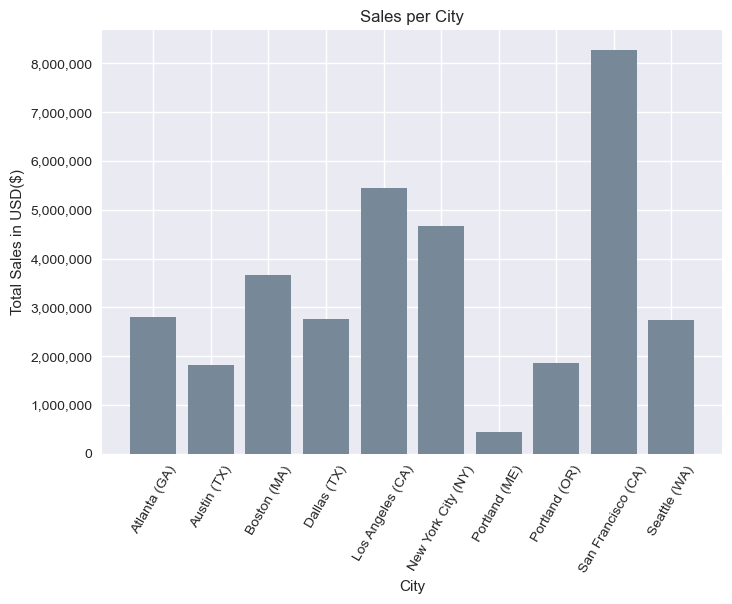

In [13]:
plt.bar(city_sale["City"], city_sale["Total"], color = "lightslategray")
plt.xticks(city_sale["City"], rotation = 60)
plt.style.use("seaborn")
plt.title("Sales per City")
plt.ylabel("Total Sales in USD($)")
plt.xlabel("City")
plt.ticklabel_format(axis="y", useOffset=False, style="plain")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
# add hour column to dataframe
all_sales["Hour"] = all_sales["Order Date"].dt.hour

In [15]:
# Hour dataframe
hours = all_sales.groupby(["Hour"])["Quantity Ordered"].count().to_frame().reset_index()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9936\423213698.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


<function matplotlib.pyplot.show(close=None, block=None)>

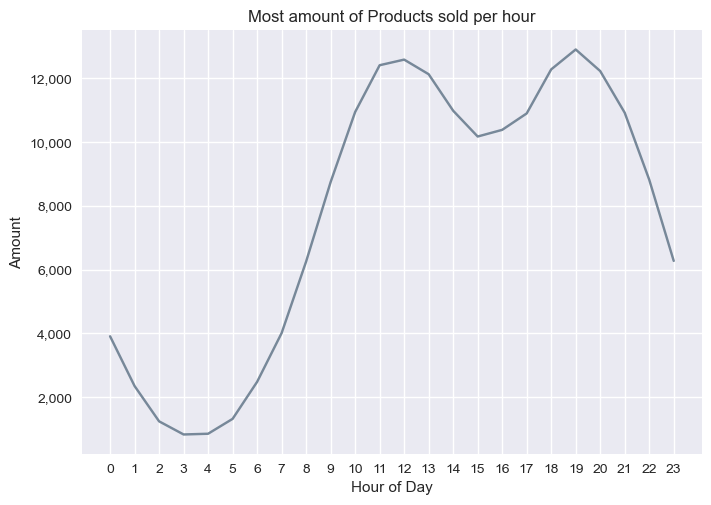

In [16]:
plt.plot(hours["Hour"], hours["Quantity Ordered"], color = "lightslategray")
plt.xticks(hours["Hour"])
plt.style.use("seaborn")
plt.title("Most amount of Products sold per hour")
plt.ylabel("Amount")
plt.xlabel("Hour of Day")
plt.ticklabel_format(axis="y", useOffset=False, style="plain")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show


#### Best time is before 11 am and/or 7pm

### Question 4: What products are most often sold together?

In [17]:
orders = all_sales[all_sales["Order ID"].duplicated(keep=False)]

orders["Grouped"] = orders.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
duplicated_orders = orders[["Order ID", "Grouped"]].drop_duplicates()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9936\2260953339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["Grouped"] = orders.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [18]:
# Source: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for order in duplicated_orders["Grouped"]:
    order_list = order.split(",")
    count.update(Counter(combinations(order_list, 2)))

for key, value in count.most_common(10):
    print(key, value)
    


('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190


### What product sold the most? Why do you think it sold the most?

In [19]:
products = all_sales.groupby(["Product"])["Quantity Ordered"].sum().to_frame().reset_index()

In [20]:
products.sort_values(by= "Quantity Ordered", ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
15,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
17,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
2,27in FHD Monitor,7550.0
18,iPhone,6849.0
1,27in 4K Gaming Monitor,6244.0


C:\Users\Pablo\AppData\Local\Temp\ipykernel_9936\3125825923.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


<function matplotlib.pyplot.show(close=None, block=None)>

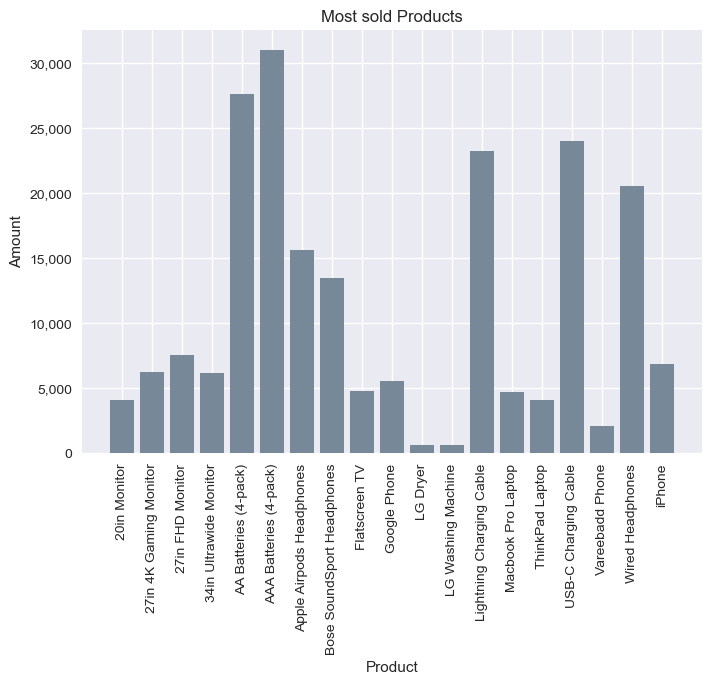

In [21]:
plt.bar(products["Product"], products["Quantity Ordered"], color = "lightslategray")
plt.xticks(products["Product"], rotation = 90)
plt.style.use("seaborn")
plt.title("Most sold Products")
plt.ylabel("Amount")
plt.xlabel("Product")
plt.ticklabel_format(axis="y", useOffset=False, style="plain")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show

In [22]:
price_list = all_sales.groupby(["Product"]).mean()["Price Each"].to_frame().reset_index()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9936\2901695876.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products["Product"], rotation = 90)


<function matplotlib.pyplot.show(close=None, block=None)>

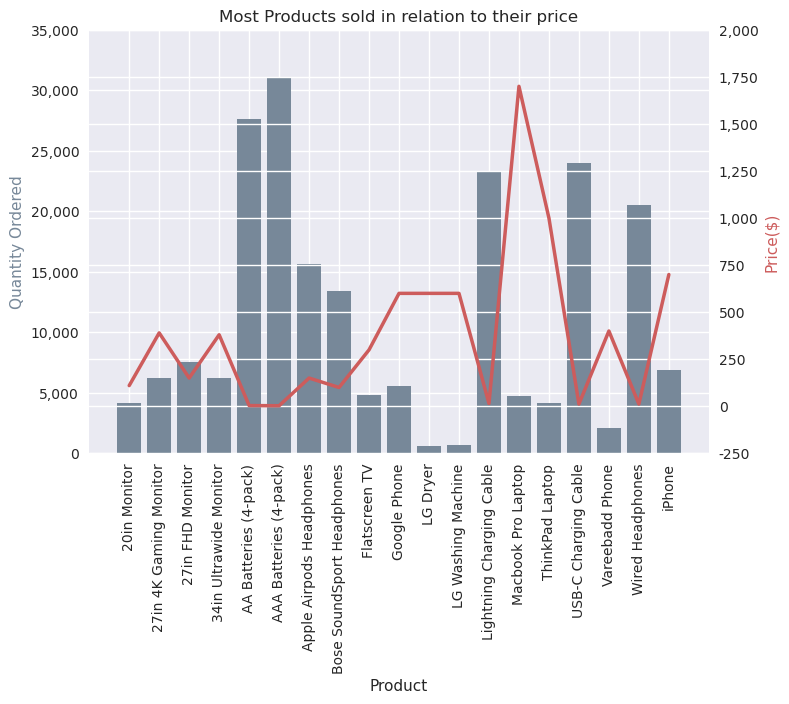

In [23]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products["Product"], products["Quantity Ordered"], color = "lightslategray")
ax2.plot(products["Product"], price_list["Price Each"], color = "indianred", linewidth = 2.5)

ax1.set_xlabel("Product")
ax2.set_ylabel("Price($)", color = "indianred")
ax1.set_ylabel("Quantity Ordered", color = "lightslategray")
ax1.set_xticklabels(products["Product"], rotation = 90)

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Most Products sold in relation to their price")
plt.style.use("classic")
plt.show

### Conclusion

There is a slight tendency of cheaper Products be ordered more. Best Example are the Batteries aswell as the Lightning Cable and USB-C Charging Cable.
